# Conteo de soluciones 

![img](IMG_2077.jpg)

![img](IMG_2079.jpg)

![img](IMG_2078.jpg)

In [12]:
import pennylane as qml
from pennylane import numpy as np

target_wires = [0,1,2,3]
estimation_wires = [4,5,6,7,8,9,10]

def U(wires):
    
    #oracle
    qml.FlipSign(0, wires = wires)
    qml.FlipSign(12, wires = wires)
    qml.FlipSign(3, wires = wires)
    qml.FlipSign(2, wires = wires)
    qml.FlipSign(13, wires = wires)
    
    #grover
    
    qml.GroverOperator(wires = wires)
    
dev = qml.device("default.qubit", wires = target_wires + estimation_wires)

@qml.qnode(dev)
def circuit():
    
    for wire in target_wires:
        qml.Hadamard(wires = wire)
        
    matrix = qml.matrix(U)(wires = target_wires)
    qml.QuantumPhaseEstimation(matrix, estimation_wires = estimation_wires, target_wires = target_wires)
    return qml.probs(wires = estimation_wires)


<BarContainer object of 128 artists>

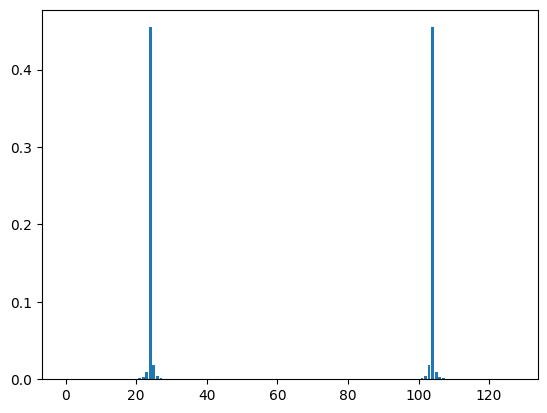

In [13]:
import matplotlib.pyplot as plt

output = circuit()
plt.bar(range(len(output)), output)

In [14]:
x = np.argmax(output)
theta = np.pi * x / (2 ** len(estimation_wires))
theta

2.552544031041707

In [15]:
m = 2 ** len(target_wires) * np.sin(theta) ** 2
print(m)

4.938532541079281
